# Red Wine Quality5

In [1]:
import pandas as pd 
import numpy as np
import os

In [2]:
df = pd.read_csv("D:/Medium/Red Wine Quality/winequality-red.csv") 

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Data Validation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


A quick overview tells us that the ingested data contains 11 features that lead to a classification of the redwine quality (12th column). We have 1599 instances that we can train and test the model on.

Missing data detection

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The null test shows that there is no null value in the data which means further missing data treatment ist not required.

Data Visualization

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


<AxesSubplot:>

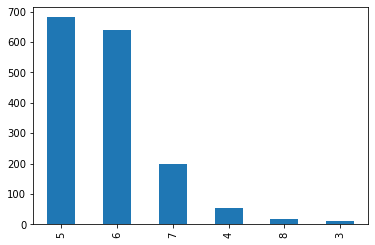

In [5]:
#Visualization
from matplotlib import pyplot as plt
import seaborn as sns

print(df.quality.value_counts()) #shows that classifications as quality 3 and 8 might be unclassifiable since only a few samples for training exist
df.quality.value_counts().plot(kind='bar')

Counting the different classifications shows a slight imbalance in the data since data classifid as 3, 4 and 8 are underpresented compared to wine with qualities 5, 6 and 7. From the information about the data in Kaggle, we know that the rating was given from 1 to 10. Quality values 1,2,9 and 10 are not presented in the data set which means the algorithm to be chosen will never classify any new introduced wine with these values. How and if we treat the imbabalanced dataset will be decided after one iteration showing in the model evaluation how the imbalanced data influences the predictions.

Data distribution

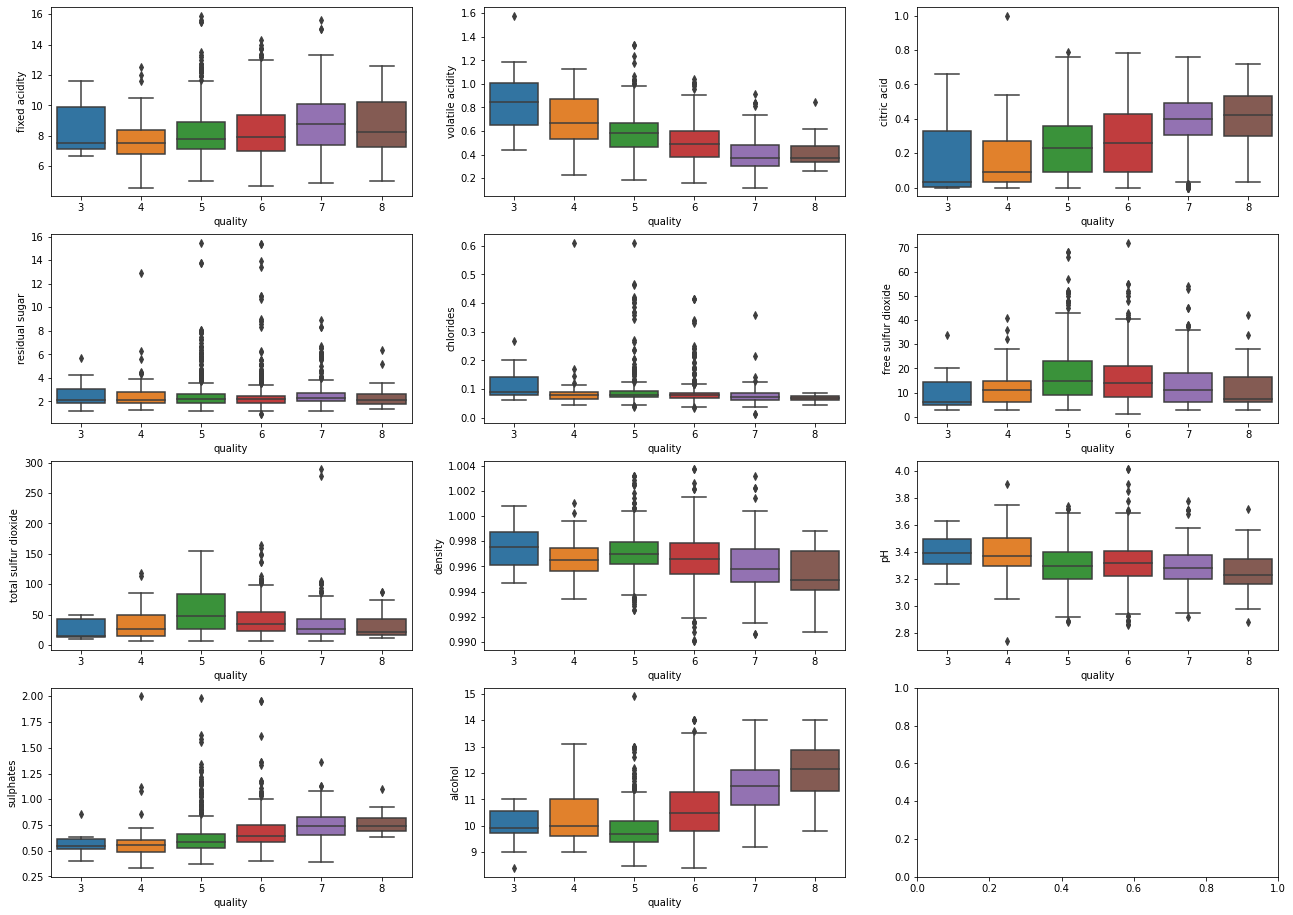

In [6]:
#Boxplots for every feature and the according quality values from 3 to 8

features = df.drop(columns=['quality'])
    
f, ax = plt.subplots(4, 3, figsize=(22, 16))
for i, var in enumerate(features):
    sns.boxplot(x='quality', y=var, data=df, ax=ax.flatten()[i])

Secondly we can get a first idea which properties might contribute to outstanding quality (8) (which need to be proven later):

    relatively small volatile acidity
    high amount of citric acid
    low density
    high amount of sulphates
    tend to have a higher alcohol content

In [7]:
#Boxplot values for different features broken down to the different quality classes
for feature in features:
    print(feature)

    for i in range(3,9):     
        df_i = df.loc[df['quality'] == i]

        features_perqual = df_i.drop(columns=['quality'])
      
  
        upper_quartile = np.percentile(features_perqual[feature], 75)
        lower_quartile = np.percentile(features_perqual[feature], 25)
        #print(upper_quartile)
        
        iqr = upper_quartile - lower_quartile
        upper_whisker = features_perqual[feature][features_perqual[feature]<=upper_quartile+1.5*iqr].max()
        lower_whisker = features_perqual[feature][features_perqual[feature]>=lower_quartile-1.5*iqr].min()
        #print('Quality:', i)
        print('Quality:', i, 'Upper whisker/Lower whisker:', upper_whisker,'/', lower_whisker)

fixed acidity
Quality: 3 Upper whisker/Lower whisker: 11.6 / 6.7
Quality: 4 Upper whisker/Lower whisker: 10.5 / 4.6
Quality: 5 Upper whisker/Lower whisker: 11.6 / 5.0
Quality: 6 Upper whisker/Lower whisker: 13.0 / 4.7
Quality: 7 Upper whisker/Lower whisker: 13.3 / 4.9
Quality: 8 Upper whisker/Lower whisker: 12.6 / 5.0
volatile acidity
Quality: 3 Upper whisker/Lower whisker: 1.185 / 0.44
Quality: 4 Upper whisker/Lower whisker: 1.13 / 0.23
Quality: 5 Upper whisker/Lower whisker: 0.98 / 0.18
Quality: 6 Upper whisker/Lower whisker: 0.91 / 0.16
Quality: 7 Upper whisker/Lower whisker: 0.735 / 0.12
Quality: 8 Upper whisker/Lower whisker: 0.62 / 0.26
citric acid
Quality: 3 Upper whisker/Lower whisker: 0.66 / 0.0
Quality: 4 Upper whisker/Lower whisker: 0.54 / 0.0
Quality: 5 Upper whisker/Lower whisker: 0.76 / 0.0
Quality: 6 Upper whisker/Lower whisker: 0.78 / 0.0
Quality: 7 Upper whisker/Lower whisker: 0.76 / 0.03
Quality: 8 Upper whisker/Lower whisker: 0.72 / 0.03
residual sugar
Quality: 3 Upp

In [8]:
#Boxplot values for all different features across all different quality classes
for feature in features:
    
    upper_quartile = np.percentile(features[feature], 75)
    lower_quartile = np.percentile(features[feature], 25)
        #print(upper_quartile)
        
    iqr = upper_quartile - lower_quartile
    upper_whisker = features[feature][features[feature]<=upper_quartile+1.5*iqr].max()
    lower_whisker = features[feature][features[feature]>=lower_quartile-1.5*iqr].min()
    
    print(feature)
    print('Upper whisker/Lower whisker:', upper_whisker,'/', lower_whisker)

fixed acidity
Upper whisker/Lower whisker: 12.3 / 4.6
volatile acidity
Upper whisker/Lower whisker: 1.01 / 0.12
citric acid
Upper whisker/Lower whisker: 0.79 / 0.0
residual sugar
Upper whisker/Lower whisker: 3.65 / 0.9
chlorides
Upper whisker/Lower whisker: 0.119 / 0.0409999999999999
free sulfur dioxide
Upper whisker/Lower whisker: 42.0 / 1.0
total sulfur dioxide
Upper whisker/Lower whisker: 122.0 / 6.0
density
Upper whisker/Lower whisker: 1.001 / 0.99235
pH
Upper whisker/Lower whisker: 3.68 / 2.93
sulphates
Upper whisker/Lower whisker: 0.99 / 0.33
alcohol
Upper whisker/Lower whisker: 13.5 / 8.4


Comparing the values for the overall values for the whiskers per feature with the values for the whiskers per feature and quality shows that the interquartile ranges mostly lie randomly within the ranges of the feature per quality. Since we have multiple features, treating outliers by only deleting data points that do not fall in the inter quartile range seems to be wrong. Because it would imply that the features do not interact with each other. That is an assumption we cannot make.

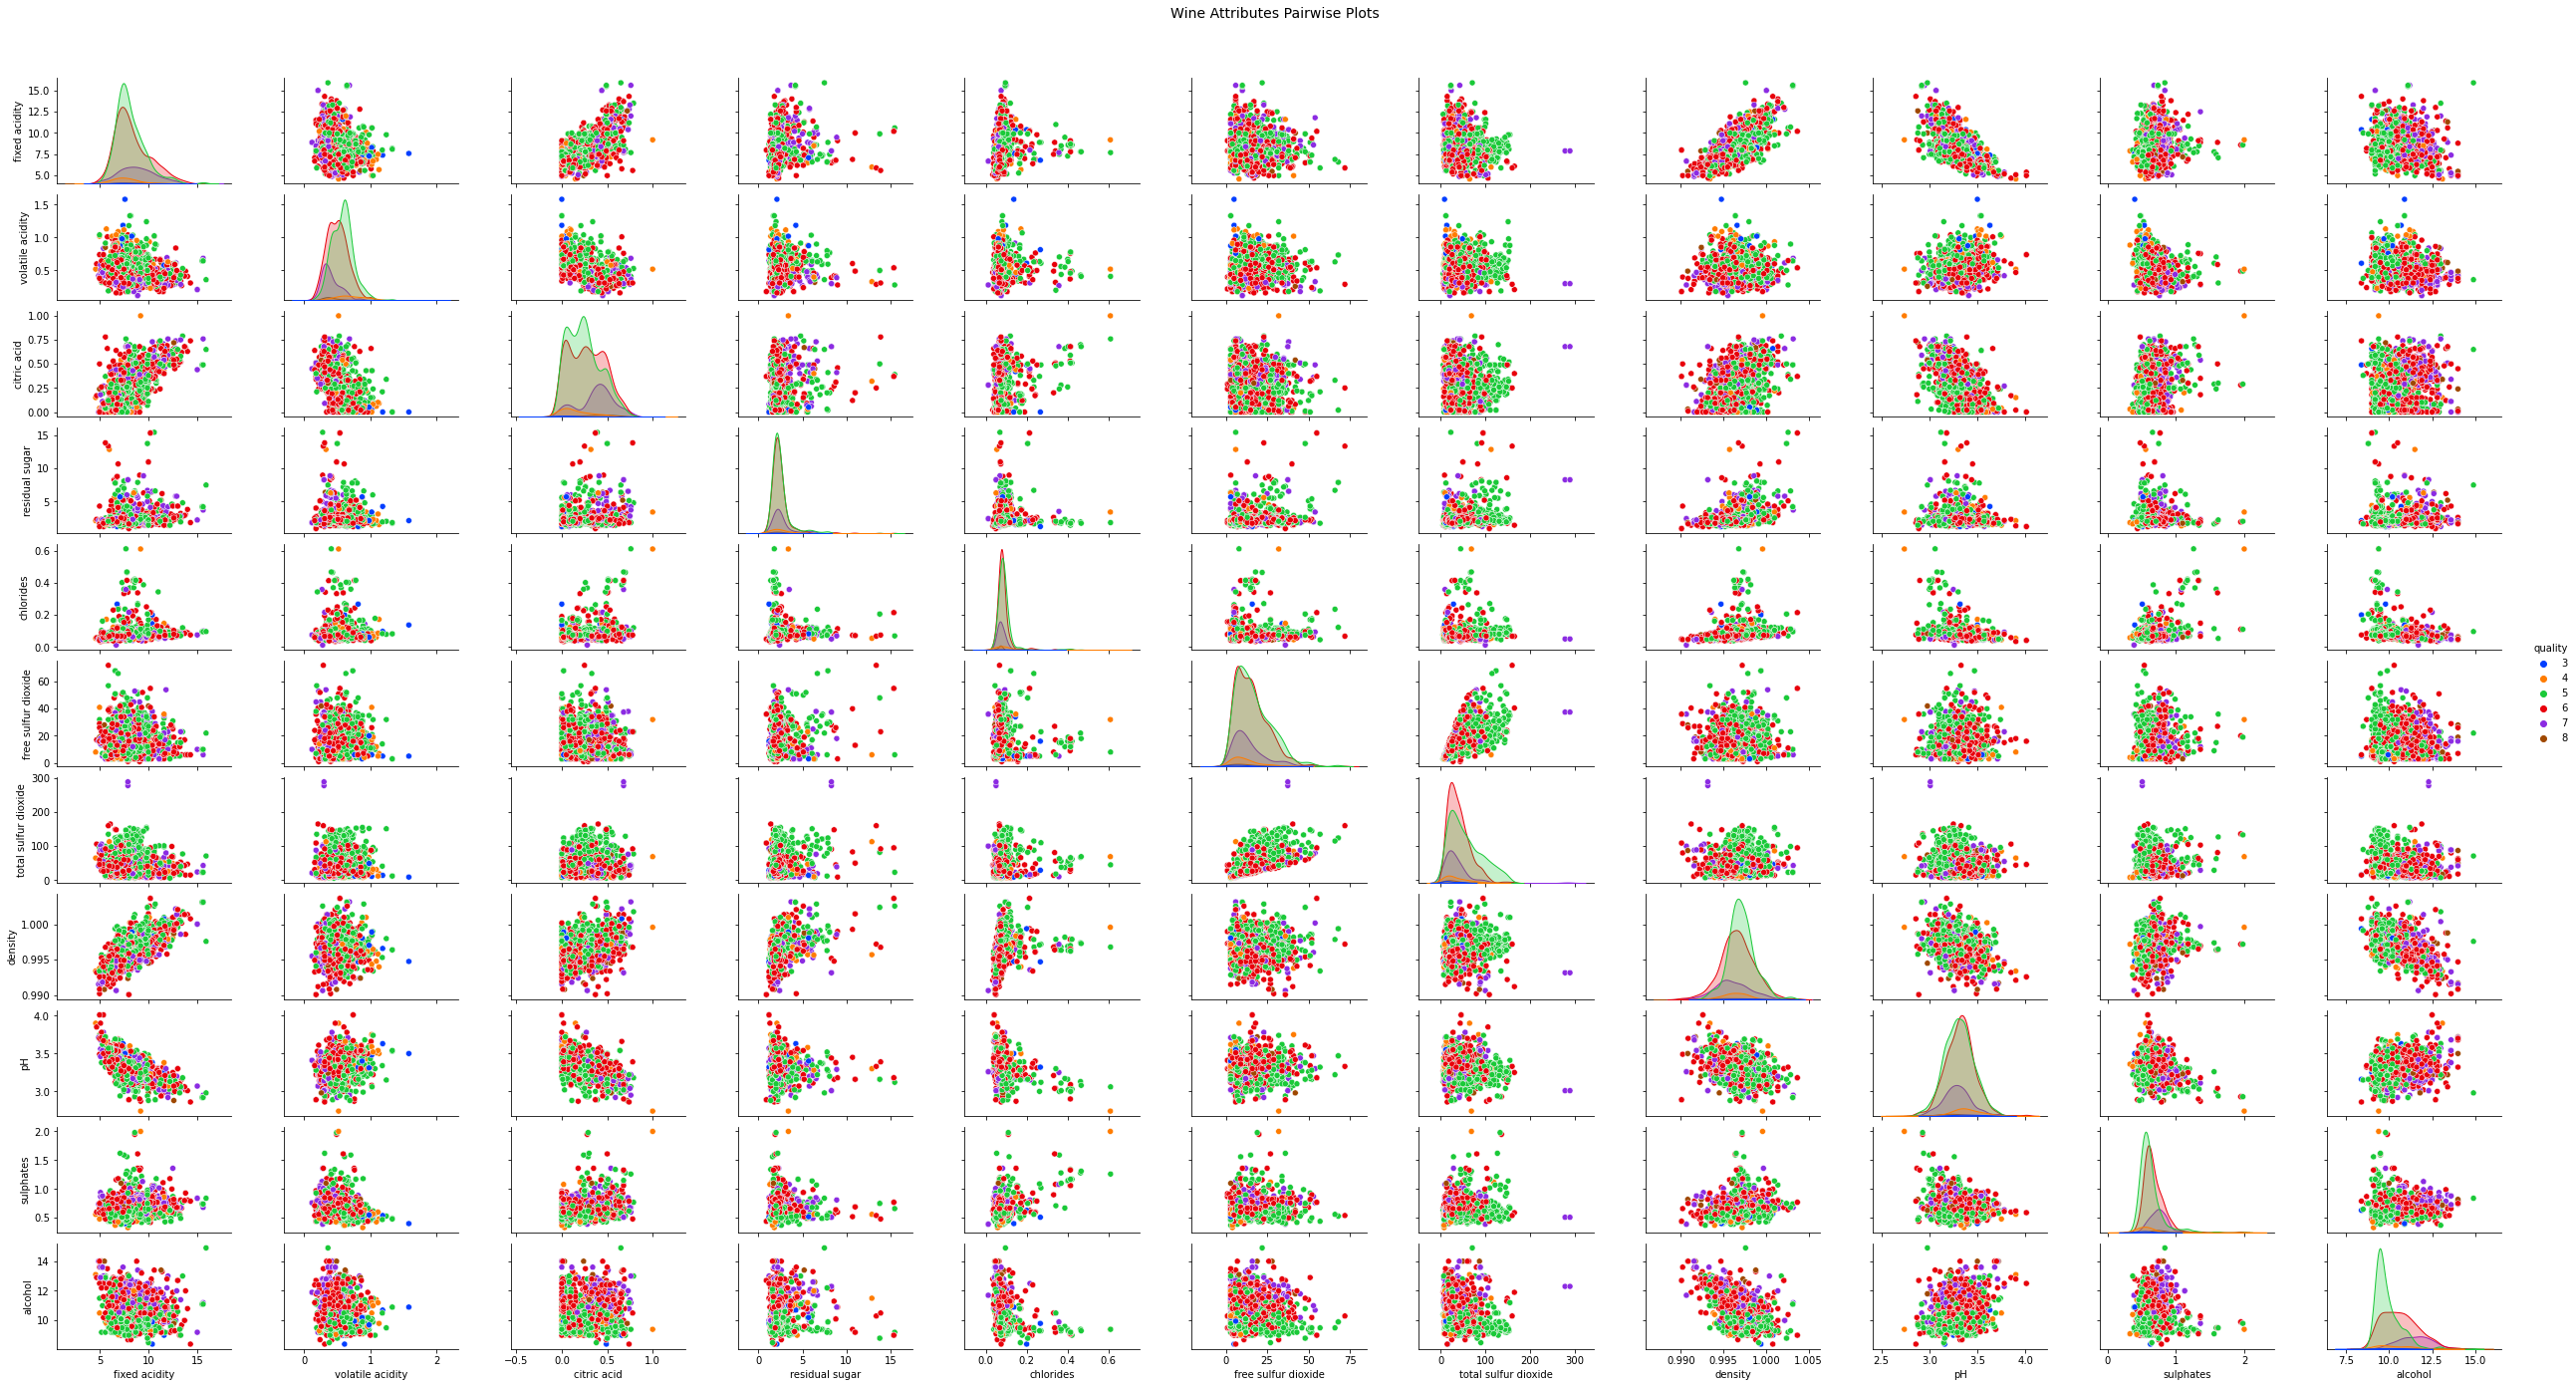

In [9]:
#Create the pairplot

sns.set_palette("bright")
pp = sns.pairplot(df, hue='quality', height=1.8, aspect=1.8, diag_kind = 'kde', palette="bright")
    
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

We can interpret from the pairplot that there are not many outliers compared to the number of instances because the clouds of points seem to be very dense for the majority of features, only a few points lie outside. Additionally, the quality does not seem to have an impact whether the points are within the cloud or outside. All features seem to follow more or less a gaussian distribution. These findings will help us to choose an appropiate outlier detection technique later on.

Correlations

<AxesSubplot:>

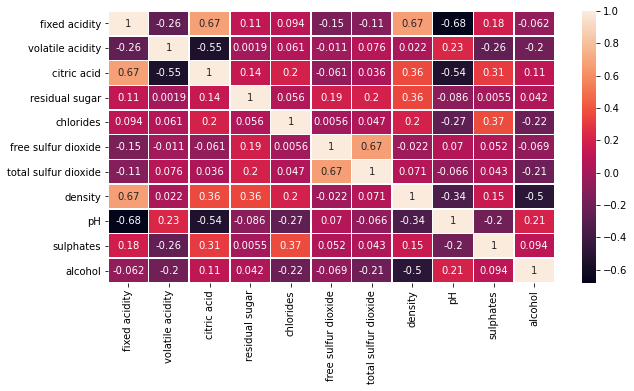

In [10]:
#With calculating the Pearson correlation, linear correlation between the features are identified
lin_corr = features.corr()

f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(lin_corr, annot=True, linewidths=.5, ax = ax)

The heatmap gives us a first guess which features could be higher correlated. It shows an increased linear correlation for following pairs:

    "free sulfur dioxide" and "total sulfur dioxide"
    "fixed acidity" and "citric acid"

I consider features being highly correlated if the correlation is > 0.7 https://www.andrews.edu/~calkins/math/edrm611/edrm05.htm. By looking at the specific linear correlation values non of the identified pairs have a correlation above 0.7. To ensure that the features do not correlate at all, we check the Spearman correlation which gives us also information about correlations that are non-linear.

<AxesSubplot:>

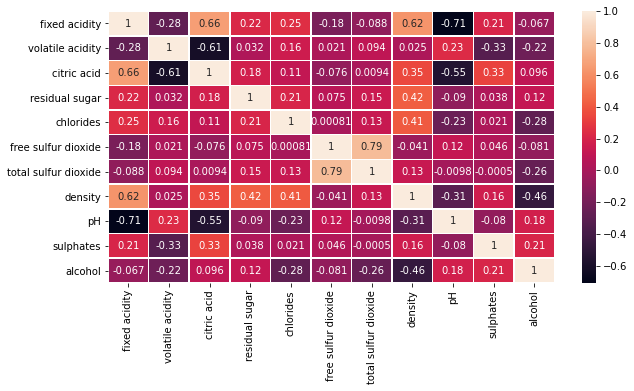

In [11]:
#Checking the Spearman correlation whether there are any correlations

spear_corr = features.corr(method='spearman')

f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(spear_corr, annot=True, linewidths=.5, ax = ax)

As we can see, the free and total sulfur dioxide are non-linear correlated with 0.79.

Nevertheless, this dataset only contains 11 features. If the amount of features were higher, we could consider eliminating some correlated due to the high computational costs. Meanwhile a correlation underneath 0.95 with only 11 features in total in the set is not enough to consider elimination here.

Outlier treatment

For a multivariate Outlier Detection we choose Isolation Forest. The To learn more about Isolation Forest read https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e. Above all we use Isolation Forest because do not exactly know the distribution of the data as well as it is a multidimensional feature space. On top of that, Isolation Forests are easy to optimize and it is fairly robust. Why we do not use DBSCAN instead is a matter of effort. DBSCAN requires preprocessing steps whereas Isolation Forest does not.

In [12]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV

#all feature columns must be modelled
features=df.columns[1:11]

#hyperparameters to be decided
clf=IsolationForest(n_estimators=50, max_samples='auto', contamination = 0.05, \
                        max_features=1.0, bootstrap=False, n_jobs=-1, verbose=0)
clf.fit(df[features])

pred = clf.predict(df[features])
df['anomaly']=pred
outliers=df.loc[df['anomaly']==-1]
outlier_index=list(outliers.index)

#Find the number of anomalies and normal points here points classified -1 are anomalous
print(df['anomaly'].value_counts())

 1    1519
-1      80
Name: anomaly, dtype: int64


For the parameters, we use trial and error by checking the pairwaise plot each time we change the parameters. Since we do not have a classification of outlier or not, viewing the pairwise plot and identify whether the anomaly detection has coloured the outliers in blue has to be sufficient. By using this methods we need to estimate specifically whether it is worth it to upgrade the contamination rate in order to identify more outliers trading a false positive marking inliers as outliers. We tried different contamination rates with the result that the predictions that excluded less than 5% of the instances got worse. Another way to overcome the problem of not knowing the contamination rate of outliers is an Extended Isolation Forest. To learn more about Extended Isoltation Forest read https://towardsdatascience.com/outlier-detection-with-extended-isolation-forest-1e248a3fe97b

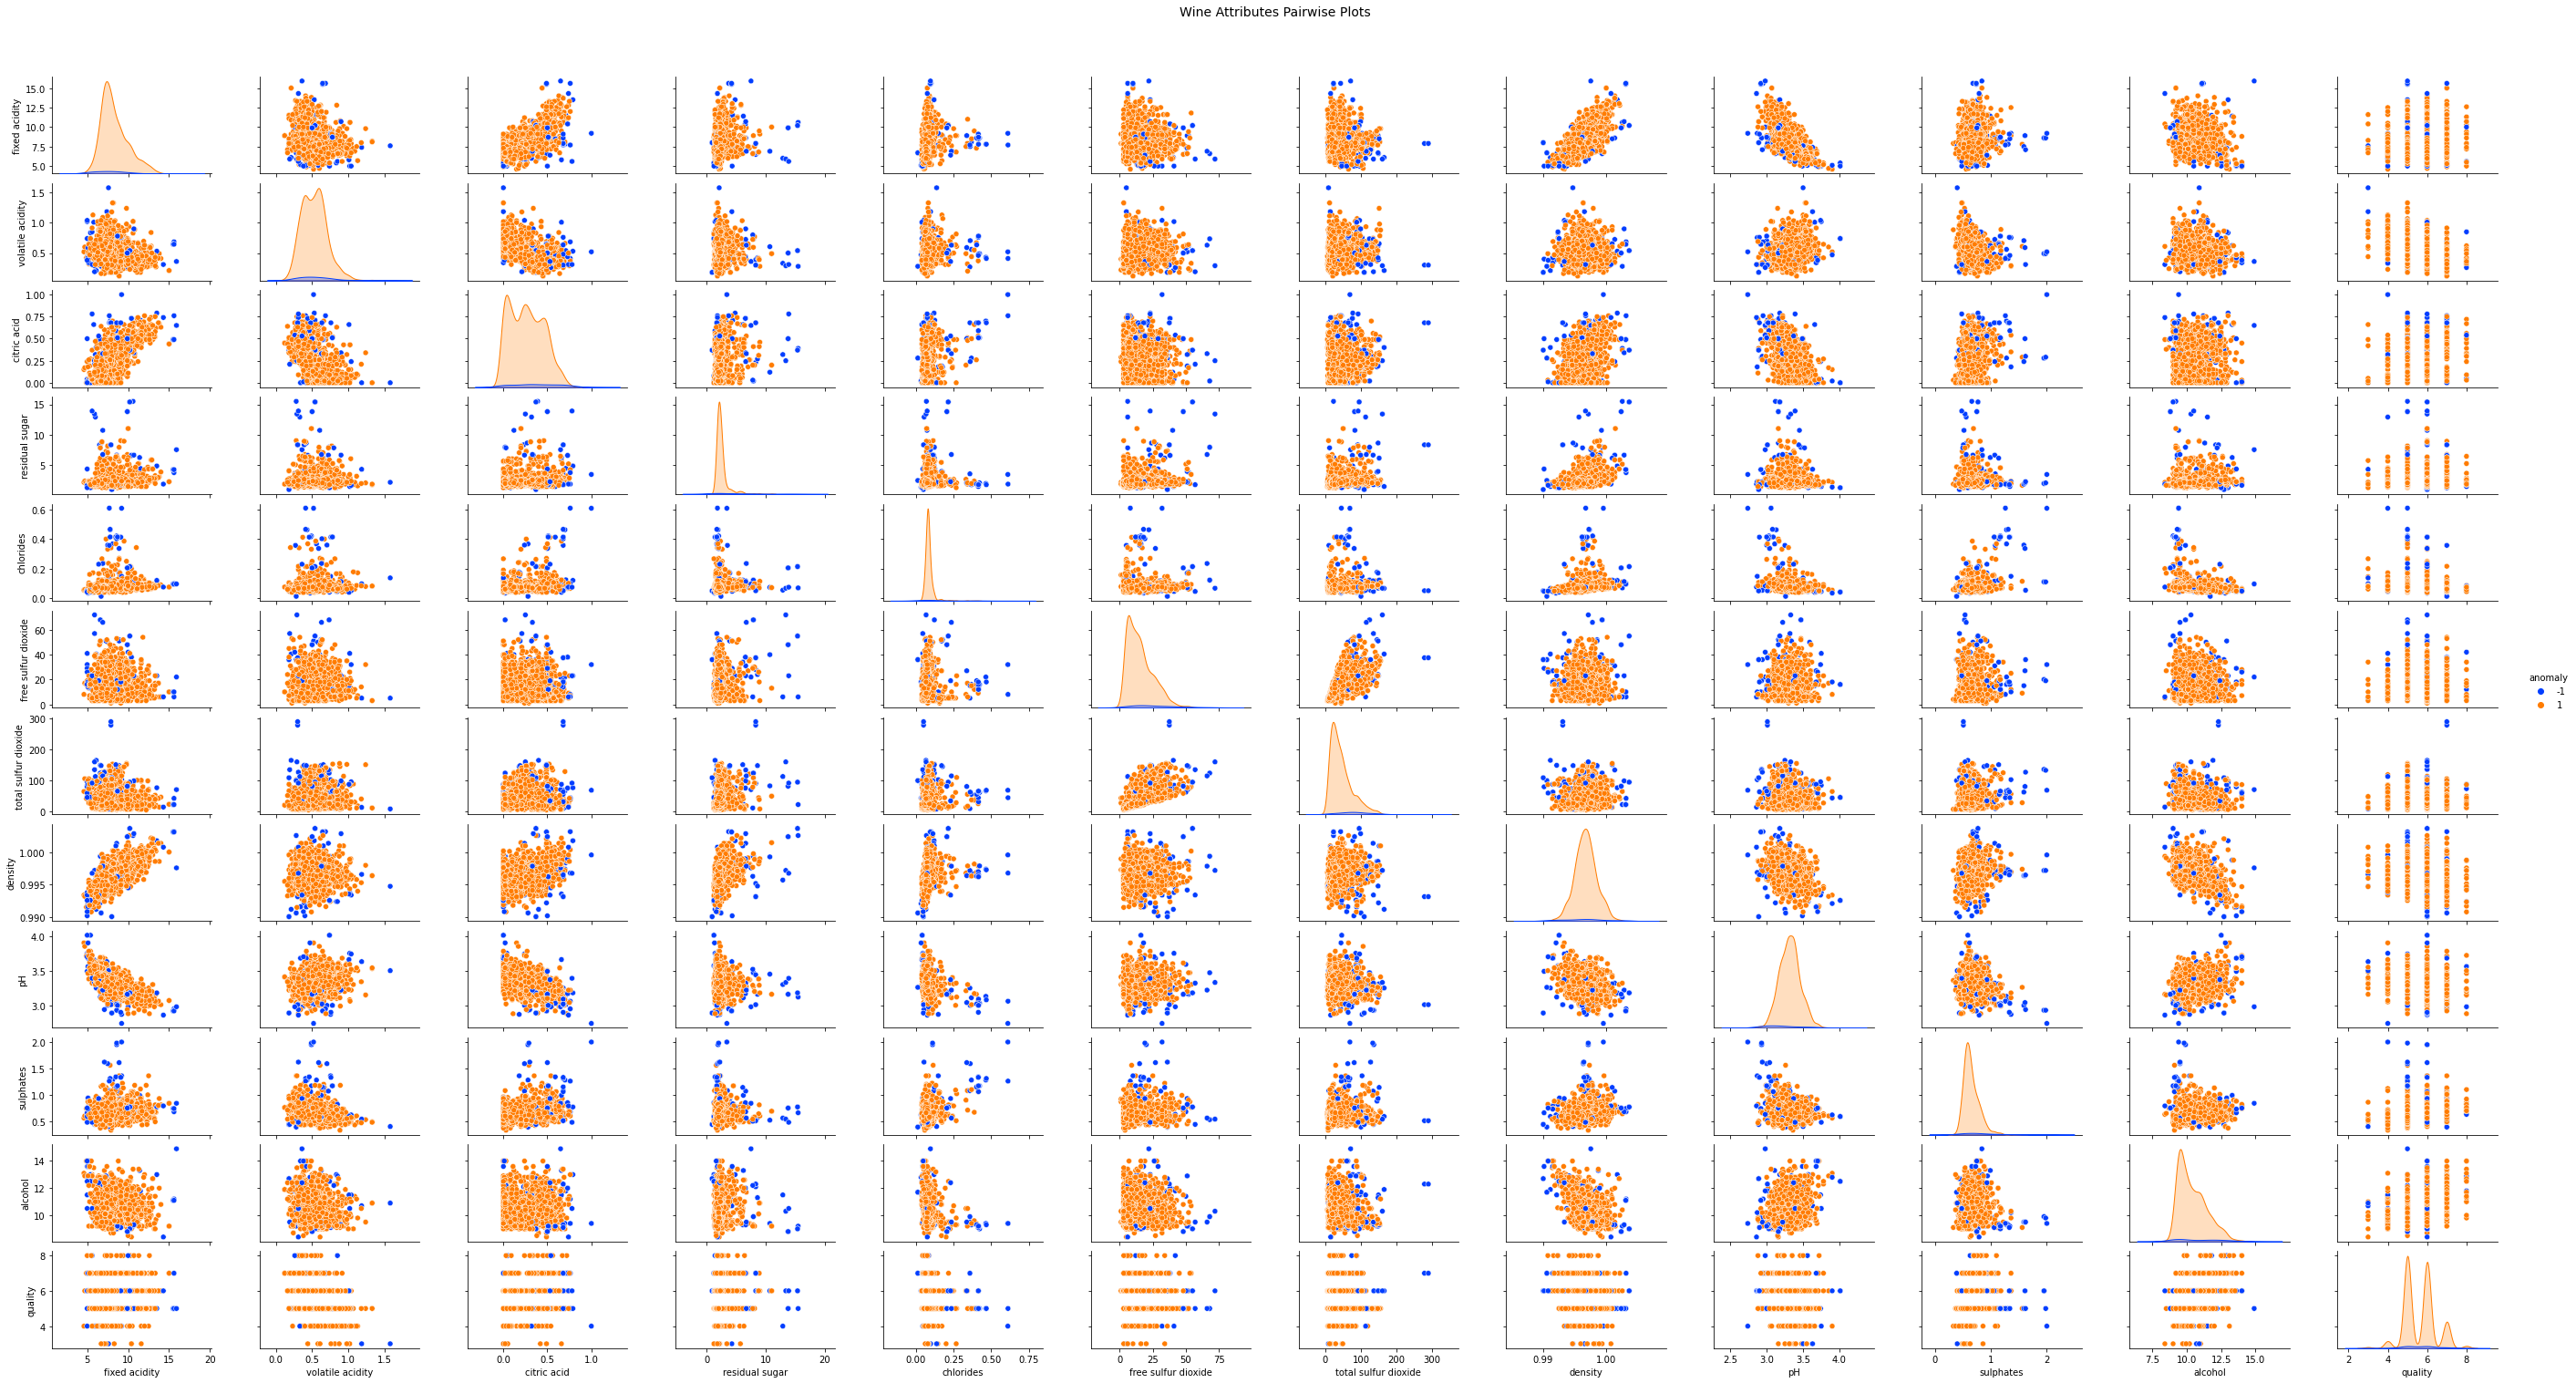

In [13]:
#Pairplot marking the outliers
pp = sns.pairplot(df, hue='anomaly', height=1.8, aspect=1.8, diag_kind = 'kde', palette="bright")
           
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

We chose to remove the outliers from the dataset. What proved to be sufficient here, can be seen as cracking a nut with a sledgehammer. Other treatment could be considered marking the outliers as missing values and impute them by using the Miss Forest algorithm.

In [14]:
#Remove all identified outliers from the dataset 

df_preprocessed = df[df.anomaly != -1]

df_preprocessed = df_preprocessed.drop(columns=['anomaly'])

print(df_preprocessed.quality.value_counts())

5    650
6    608
7    187
4     50
8     16
3      8
Name: quality, dtype: int64


As a result of the preprocessing steps above we receive a dataframe that

    contains less outliers
    we approved has no drastic correlations across the features

Although it is very unlikely to receive good predictions for the qualities 3,4 and 8 or any predictions for the qualities 0, 1, 2, 9, 10 which are not listed at all, the data is now brought in a suitable form for training

Train-Test Split

In [15]:
from sklearn.model_selection import train_test_split

#X Dataset, y dataset

X = df_preprocessed.drop(columns=['quality'])
y = df_preprocessed['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardization

The last preprocessing step will be a standardization of the X data. Why standardization can optimize your model you can read here https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832. In our case it is obvious when you see the values for the different physiochemical units. Where "total sulfur dioxide" varies from 0 - 300, chlorides only vary from 0 - 0.6. This could lead to a bias in our model.

In [16]:
#Scaling the X Data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Model training

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 4. Model training

#Perform Grid Search for hyperparameter tuning
param_grid = {'n_estimators': [1,5,10,50,100,200,500],
              'max_depth': [2, 4, 6, 8]}

RFC_qual = RandomForestClassifier()

grid_clf = GridSearchCV(RFC_qual, param_grid)
grid_clf.fit(X_train, y_train)

print(grid_clf.best_estimator_.n_estimators)
print(grid_clf.best_estimator_.max_depth)

100
8


In [18]:
y_pred = grid_clf.predict(X_test)

Model testing & Evaluation

In [19]:
from sklearn import metrics

print('RFC Accuracy =', metrics.accuracy_score(y_test, y_pred))

RFC Accuracy = 0.6217105263157895


In [20]:
from sklearn.metrics import confusion_matrix

#Confusion matrix creation
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'])

Predicted,5,6,7,8
Actual,,,,
3,0,2,0,0
4,5,3,0,0
5,96,45,0,0
6,26,79,4,0
7,3,21,14,1
8,0,3,2,0


As estimated before, the prediction for qualities 3, 4 and 8 are poor since they are not even there. We cannot leave the results with an accuracy of around 60 something %.

<AxesSubplot:>

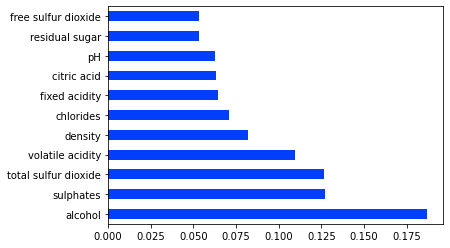

In [21]:
#Feature importance matrix 

from sklearn.inspection import permutation_importance
from pandas import DataFrame

(pd.Series(grid_clf.best_estimator_.feature_importances_, index=X.columns).nlargest(11).plot(kind='barh'))

Iterations

Bin creation

The poor performance for the qualities 3, 4 and 8 due to the few training samples, we have predicted before. In order to eliminate that fact, I will split the data in three groups: Bad quality and good quality.

In [22]:
#Create a new dataframe that contains column bin instead of quality
#Create train/test data that can be distinguished from train/test on single quality level

# Creating  categories for poor quality as 0 (0, 1, 2, 3), medium quality as 1 (4, 5, 6) and high quality as 2 (7, 8, 9, 10)

df_preprocessed.loc[(df_preprocessed['quality']<= 3) , 'quality'] = 0
df_preprocessed.loc[(df_preprocessed['quality']>= 4) & (df_preprocessed['quality']< 7), 'quality'] = 1
df_preprocessed.loc[(df_preprocessed['quality']>= 7) , 'quality'] = 2

In [23]:
print(df_preprocessed.quality.value_counts())

1    1308
2     203
0       8
Name: quality, dtype: int64


In [24]:
#X Dataset, y dataset

X_cat = df_preprocessed.drop(columns=['quality'])
y_cat = df_preprocessed['quality']

X_train, X_test, y_train, y_test = train_test_split(X_cat, y_cat, test_size=0.2, random_state=42)

In [25]:
#Scaling the X Data,
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

To learn more about caling read this https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

In [26]:
# 4. Model training

RFC = RandomForestClassifier(n_jobs=-1, max_features= 'sqrt' ,n_estimators=50)

#Perform Grid Search for hyperparameter tuning
param_grid = {'n_estimators': [1,5,10,50,100,200,500],
              'max_depth': [2, 4, 6, 8],
              'max_features': ['auto', 'sqrt', 'log2']}

grid_clf = GridSearchCV(RFC, param_grid)
grid_clf.fit(X_train, y_train)

print(grid_clf.best_estimator_.n_estimators)
print(grid_clf.best_estimator_.max_depth)

10
8


In [27]:
from sklearn.metrics import classification_report

# 5. Model testing
y_pred = grid_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print('RFC Accuracy =', metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.89      0.97      0.93       258
           2       0.67      0.36      0.47        44

    accuracy                           0.88       304
   macro avg       0.52      0.44      0.47       304
weighted avg       0.85      0.88      0.86       304

RFC Accuracy = 0.875


C:\Users\ubjd\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ubjd\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ubjd\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
#Confusion Matrix creation
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'])

Predicted,1,2
Actual,,
0,2,0
1,250,8
2,28,16


<AxesSubplot:>

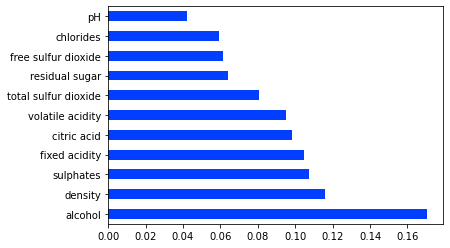

In [29]:
#Feature importance matrix 

from sklearn.inspection import permutation_importance
from pandas import DataFrame

(pd.Series(grid_clf.best_estimator_.feature_importances_, index=X.columns).nlargest(11).plot(kind='barh'))

Conclusion

    There are instances of red wine with 11 features of chemical values and identified quality with classes 3,4,5,6,7 and 8.
    There is no missing data.
    Some classes are underrepresented.

We visualized the data and found out:

    No features are significantly correlated, so we kept every features.
    The boxplots for every class show that points outside the interquartile range are not related to the imbalancy in the data.

Binning the data without any oversampling data treatment worked out best regarding the accuracy score of ~88-90%. But those results need to be looked at critically since they will never classify a wine with poor quality and also when classifying excellent quality the performance is lacking. Any oversampling approach failed to improve the single classification or the binned classification better.

The feature importance confirmed what we could already guessed from the boxplots. Both models (the binned and the single classification) are highlgy influenced by:

    alcohol
    volatile acidity and
    sulphates